# Rutherford Scattering



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [10]:

#For space correction
def N(x,n):
    x = np.deg2rad(x)
    return 2*(np.pi*np.sin(x))*n

l = np.array([(30, 0.157),(25, 0.337), (20, 1.3015),(15,7.17),(10,22.343),(5,35.045),(5,32.85),(10,18.793),(15,4.16),(20,0.8225),(25,0.208),(30,0.107)])

for i in range(len(l)):
    print(f"n = {l[i][1]}, x = {l[i][0]}, N(x,n) = {N(l[i][0], l[i][1])}")

n = 0.157, x = 30.0, N(x,n) = 0.49323004661359743
n = 0.337, x = 25.0, N(x,n) = 0.8948660433649347
n = 1.3015, x = 20.0, N(x,n) = 2.796892185003242
n = 7.17, x = 15.0, N(x,n) = 11.659911513483951
n = 22.343, x = 10.0, N(x,n) = 24.377635769515706
n = 35.045, x = 5.0, N(x,n) = 19.191191585096416
n = 32.85, x = 5.0, N(x,n) = 17.989175162517256
n = 18.793, x = 10.0, N(x,n) = 20.504359710715153
n = 4.16, x = 15.0, N(x,n) = 6.765025369050662
n = 0.8225, x = 20.0, N(x,n) = 1.7675327100769624
n = 0.208, x = 25.0, N(x,n) = 0.5523208813647074
n = 0.107, x = 30.0, N(x,n) = 0.33615041393410783


Global fit (all data):
  A = 7.25089e-05 ± 2.67472e-05
  B = -0.03922 ± 0.461842  degrees


C:\Users\Aryan Shrivastava\AppData\Local\Temp\ipykernel_20872\1711364446.py:38: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1e2))


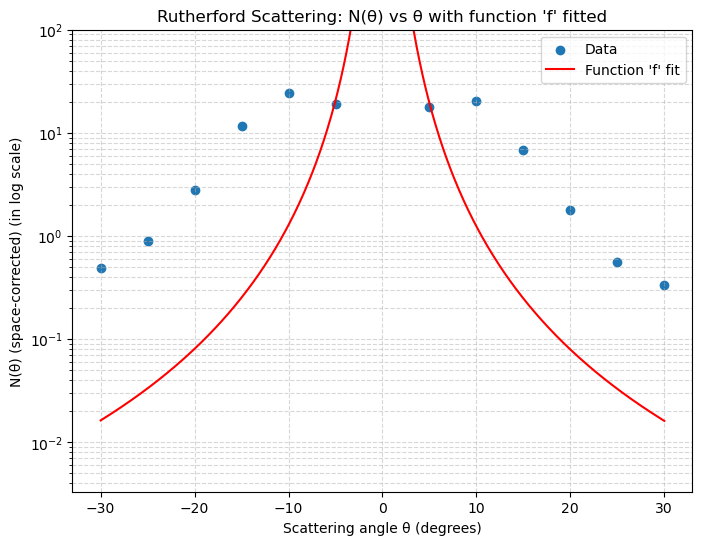

In [11]:
x = np.array([-30, -25, -20, -15, -10, -5, 5, 10, 15, 20, 25, 30], dtype=float)
y = np.array([
    0.49323004661359743, 0.8948660433649347, 2.796892185003242,
    11.659911513483951, 24.377635769515706, 19.191191585096416,
    17.989175162517256, 20.504359710715153, 6.765025369050662,
    1.7675327100769624, 0.5523208813647074, 0.33615041393410783
], dtype=float)

# Model: f(theta) = A / sin^4((theta - B)/2)
# theta and B are in DEGREES (converted to radians inside)
def f(theta_deg, A, B_deg):
    theta = np.deg2rad(theta_deg)
    B = np.deg2rad(B_deg)
    return A / (np.sin((theta - B)/2.0)**4)


p0 = [1.0, 0.0]  
popt, pcov = curve_fit(f, x, y, p0=p0, maxfev=20000)
A_fit, B_fit = popt
perr = np.sqrt(np.diag(pcov))
A_err, B_err = perr

print("Global fit (all data):")
print(f"  A = {A_fit:.6g} ± {A_err:.6g}")
print(f"  B = {B_fit:.6g} ± {B_err:.6g}  degrees")


theta_plot = np.linspace(np.min(x), np.max(x), 600)
plt.figure(figsize=(8,6))

plt.scatter(x, y, label="Data")
plt.plot(theta_plot, f(theta_plot, A_fit, B_fit), label="Function 'f' fit", color='red')
plt.yscale("log")  
plt.xlabel("Scattering angle θ (degrees)")
plt.ylabel("N(θ) (space-corrected) (in log scale)")
plt.title("Rutherford Scattering: N(θ) vs θ with function 'f' fitted")
plt.legend()
plt.ylim((0,1e2))
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


In [12]:
print(N(15,0.442))
print(N(15,0.262))
print(N(15,0.062))
print(N(15,0.031))

0.7187839454616328
0.42606650160847914
0.10082489732719735
0.050412448663598675
